In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df_restaurants = pd.read_csv('../data/raw/restaurants.csv')
df_menus = pd.read_csv('../data/raw/restaurant-menus.csv')


# Convert Price to float

In [26]:
df_menus.info()
df_restaurants.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117217 entries, 0 to 5117216
Data columns (total 5 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   restaurant_id  int64 
 1   category       object
 2   name           object
 3   description    object
 4   price          object
dtypes: int64(1), object(4)
memory usage: 195.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63469 entries, 0 to 63468
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63469 non-null  int64  
 1   position      63469 non-null  int64  
 2   name          63469 non-null  object 
 3   score         35302 non-null  float64
 4   ratings       35302 non-null  float64
 5   category      63384 non-null  object 
 6   price_range   52852 non-null  object 
 7   full_address  63016 non-null  object 
 8   zip_code      62952 non-null  object 
 9   lat           63469 non-null  float64
 10  lng           634

In [27]:
df_menus['price'] = df_menus['price'].apply(lambda x: float(x[:-4]))
df_menus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5117217 entries, 0 to 5117216
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   restaurant_id  int64  
 1   category       object 
 2   name           object 
 3   description    object 
 4   price          float64
dtypes: float64(1), int64(1), object(3)
memory usage: 195.2+ MB


## Extract Average Price and Price Sum and min and max price Per Restaurant

In [28]:
df_menus['description_len'] = df_menus['description'].apply(lambda x: len(x) if pd.notnull(x) else 0)

df_price_mean_sum = df_menus.groupby('restaurant_id')['price'].mean().reset_index()
df_price_sum = df_menus.groupby('restaurant_id')['price'].sum()
df_price_min = df_menus.groupby('restaurant_id')['price'].min()
df_price_max = df_menus.groupby('restaurant_id')['price'].max()
df_description_len_avg = df_menus.groupby('restaurant_id')['description_len'].mean()

df_price_mean_sum['price_sum'] = df_price_sum.values
df_price_mean_sum['price_min'] = df_price_min.values
df_price_mean_sum['price_max'] = df_price_max.values

df_price_mean_sum['desc_avg_len'] = df_description_len_avg.values

df_price_mean_sum.rename(columns={'price': 'avg_price'}, inplace=True)

df_price_mean_sum.info()
df_price_mean_sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63309 entries, 0 to 63308
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   restaurant_id  63309 non-null  int64  
 1   avg_price      63309 non-null  float64
 2   price_sum      63309 non-null  float64
 3   price_min      63309 non-null  float64
 4   price_max      63309 non-null  float64
 5   desc_avg_len   63309 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 2.9 MB


,restaurant_id,avg_price,price_sum,price_min,price_max,desc_avg_len
0,1,5.663684,538.05,1.89,16.99,6.915789
1,2,5.505333,330.32,0.60,8.49,86.250000
2,3,10.762143,301.34,3.00,16.78,48.678571
3,4,10.531892,389.68,2.49,16.99,213.513514
4,5,4.532576,299.15,1.00,20.00,12.090909
...,...,...,...,...,...,...
63304,63465,7.680833,1106.04,0.00,29.99,121.826389
63305,63466,5.977500,23.91,4.73,9.46,443.750000
63306,63467,7.625000,30.50,4.73,10.52,344.750000
63307,63468,14.349130,660.06,0.00,44.99,95.478261


## join the price data with the restaurant data

In [29]:
merged_df = df_restaurants.merge(df_price_mean_sum, left_on='id', right_on='restaurant_id', how='left')
merged_df.info()
merged_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63469 entries, 0 to 63468
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             63469 non-null  int64  
 1   position       63469 non-null  int64  
 2   name           63469 non-null  object 
 3   score          35302 non-null  float64
 4   ratings        35302 non-null  float64
 5   category       63384 non-null  object 
 6   price_range    52852 non-null  object 
 7   full_address   63016 non-null  object 
 8   zip_code       62952 non-null  object 
 9   lat            63469 non-null  float64
 10  lng            63469 non-null  float64
 11  restaurant_id  63309 non-null  float64
 12  avg_price      63309 non-null  float64
 13  price_sum      63309 non-null  float64
 14  price_min      63309 non-null  float64
 15  price_max      63309 non-null  float64
 16  desc_avg_len   63309 non-null  float64
dtypes: float64(10), int64(2), object(5)
memory usage: 

,id,position,name,score,ratings,category,price_range,full_address,zip_code,lat,lng,restaurant_id,avg_price,price_sum,price_min,price_max,desc_avg_len
0,1,19,PJ Fresh (224 Daniel Payne Drive),NaN,NaN,"Burgers, American, Sandwiches",$,"224 Daniel Payne Drive, Birmingham, AL, 35207",35207,33.562365,-86.830703,1.0,5.663684,538.05,1.89,16.99,6.915789
1,2,9,J' ti`'z Smoothie-N-Coffee Bar,NaN,NaN,"Coffee and Tea, Breakfast and Brunch, Bubble Tea",NaN,"1521 Pinson Valley Parkway, Birmingham, AL, 35217",35217,33.583640,-86.773330,2.0,5.505333,330.32,0.60,8.49,86.250000
2,3,6,Philly Fresh Cheesesteaks (541-B Graymont Ave),NaN,NaN,"American, Cheesesteak, Sandwiches, Alcohol",$,"541-B Graymont Ave, Birmingham, AL, 35204",35204,33.509800,-86.854640,3.0,10.762143,301.34,3.00,16.78,48.678571
3,4,17,Papa Murphy's (1580 Montgomery Highway),NaN,NaN,Pizza,$,"1580 Montgomery Highway, Hoover, AL, 35226",35226,33.404439,-86.806614,4.0,10.531892,389.68,2.49,16.99,213.513514
4,5,162,Nelson Brothers Cafe (17th St N),4.7,22.0,"Breakfast and Brunch, Burgers, Sandwiches",NaN,"314 17th St N, Birmingham, AL, 35203",35203,33.514730,-86.811700,5.0,4.532576,299.15,1.00,20.00,12.090909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63464,63465,2,IHOP (4321 N 10th St),4.6,56.0,"American, Breakfast and Brunch, burger, Comfor...",$,"4321 N 10th St, MC ALLEN, TX, 78504",78504,26.242853,-98.223984,63465.0,7.680833,1106.04,0.00,29.99,121.826389
63465,63466,29,Feldman's - N 10th Street,NaN,NaN,NaN,NaN,"3010 N 10th Street, Mc Allen, TX,",NaN,26.230764,-98.224922,63466.0,5.977500,23.91,4.73,9.46,443.750000
63466,63467,27,Feldman's - N 23rd St,NaN,NaN,NaN,NaN,"6101 N 23rd Street #B, Mc Allen, TX,",NaN,26.260353,-98.236755,63467.0,7.625000,30.50,4.73,10.52,344.750000
63467,63468,19,Church's Chicken (620 S. 10th Street),4.3,17.0,"Fast Food, Family Meals",$,"620 S. 10th Street, McAllen, TX, 78501",78501,26.197333,-98.231369,63468.0,14.349130,660.06,0.00,44.99,95.478261


### Check for missing values for merged_df

In [30]:
merged_df[['price_max', 'price_min', 'price_sum', 'zip_code']].isna().sum()

price_max    160
price_min    160
price_sum    160
zip_code     517
dtype: int64

### there are 160 record missing for price_max, price_min and price_sum out of 63,469
### so it won't make problem if remove 160 records

In [31]:
merged_df.dropna(subset=['price_max', 'price_min', 'price_sum', 'zip_code'], inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62792 entries, 0 to 63468
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             62792 non-null  int64  
 1   position       62792 non-null  int64  
 2   name           62792 non-null  object 
 3   score          35018 non-null  float64
 4   ratings        35018 non-null  float64
 5   category       62770 non-null  object 
 6   price_range    52426 non-null  object 
 7   full_address   62792 non-null  object 
 8   zip_code       62792 non-null  object 
 9   lat            62792 non-null  float64
 10  lng            62792 non-null  float64
 11  restaurant_id  62792 non-null  float64
 12  avg_price      62792 non-null  float64
 13  price_sum      62792 non-null  float64
 14  price_min      62792 non-null  float64
 15  price_max      62792 non-null  float64
 16  desc_avg_len   62792 non-null  float64
dtypes: float64(10), int64(2), object(5)
memory usage: 8.6+ 

## get data frame without price range with null values to calculate max and min price for each category

In [32]:
price_range_analysis = merged_df.dropna(subset=['price_range'])
price_range_analysis = price_range_analysis.groupby('price_range')[['price_max', 'price_min']].mean().reset_index()
price_range_analysis


,price_range,price_max,price_min
0,$,34.352069,1.547300
1,$$,35.316274,2.434294
2,$$$,60.360901,3.352532
3,$$$$,95.721200,6.206400
4,$$$$$$$$$$$$$$$$$,5.490000,0.000000


#### Removing `$$$$$$$$$$$$$$$$$` value has only one record


In [33]:
price_range_analysis = price_range_analysis[price_range_analysis['price_range'] != '$$$$$$$$$$$$$$$$$']
merged_df = merged_df[merged_df['price_range'] != '$$$$$$$$$$$$$$$$$']
price_range_analysis


,price_range,price_max,price_min
0,$,34.352069,1.547300
1,$$,35.316274,2.434294
2,$$$,60.360901,3.352532
3,$$$$,95.721200,6.206400


### price range visualization
#### price range per max price

Text(0, 0.5, 'Max Price')

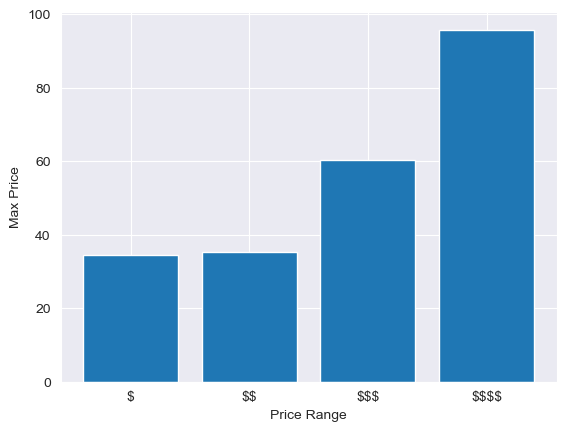

In [34]:
plt.bar(price_range_analysis['price_range'].str.replace('$', r'\$', regex=False), price_range_analysis['price_max'])
plt.xlabel("Price Range")
plt.ylabel("Max Price")

#### price range per min price

Text(0, 0.5, 'Min Price')

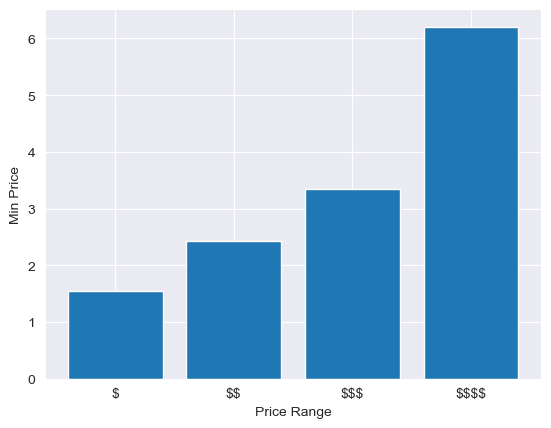

In [35]:
plt.bar(price_range_analysis['price_range'].str.replace('$', r'\$', regex=False), price_range_analysis['price_min'])
plt.xlabel("Price Range")
plt.ylabel("Min Price")

## fill missing values for price range using min and max price that we got from previous step

In [36]:
def get_price_range(mn, mx):
    if mx <= 34.352069 and mn >= 0:
        return '$'
    elif mx <= 35.316274 and mn >= 2.434294:
        return '$$'
    elif mx <= 60.360901 and mn >= 3.352532:
        return '$$$'
    else:
        return '$$$$'


merged_df.loc[merged_df['price_range'].isna(), 'price_range'] = \
    merged_df[merged_df['price_range'].isna()].apply(lambda row: get_price_range(row['price_min'], row['price_max']),
                                                     axis=1)
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 62791 entries, 0 to 63468
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             62791 non-null  int64  
 1   position       62791 non-null  int64  
 2   name           62791 non-null  object 
 3   score          35018 non-null  float64
 4   ratings        35018 non-null  float64
 5   category       62769 non-null  object 
 6   price_range    62791 non-null  object 
 7   full_address   62791 non-null  object 
 8   zip_code       62791 non-null  object 
 9   lat            62791 non-null  float64
 10  lng            62791 non-null  float64
 11  restaurant_id  62791 non-null  float64
 12  avg_price      62791 non-null  float64
 13  price_sum      62791 non-null  float64
 14  price_min      62791 non-null  float64
 15  price_max      62791 non-null  float64
 16  desc_avg_len   62791 non-null  float64
dtypes: float64(10), int64(2), object(5)
memory usage: 8.6+ 

# **Encode `price_range` to numeric values**
**Encode price_range to Numeric Values**
We'll map the price ranges as follows:
`$` → 1
- `$$` → 2
- `$$$` → 3
- `$$$$` → 4


In [37]:
price_mapping = {'$': 1, '$$': 2, '$$$': 3, '$$$$': 4}
merged_df['price_range'] = merged_df['price_range'].map(price_mapping)
merged_df['price_range']

C:\Users\mosta\AppData\Local\Temp\ipykernel_17280\3568101898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['price_range'] = merged_df['price_range'].map(price_mapping)


0        1
1        1
2        1
3        1
4        1
        ..
63462    2
63463    2
63464    1
63467    1
63468    1
Name: price_range, Length: 62791, dtype: int64

# Remove Duplicate Entries
We'll remove duplicate rows based on all columns:


In [38]:
merged_df.drop_duplicates()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62791 entries, 0 to 63468
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             62791 non-null  int64  
 1   position       62791 non-null  int64  
 2   name           62791 non-null  object 
 3   score          35018 non-null  float64
 4   ratings        35018 non-null  float64
 5   category       62769 non-null  object 
 6   price_range    62791 non-null  int64  
 7   full_address   62791 non-null  object 
 8   zip_code       62791 non-null  object 
 9   lat            62791 non-null  float64
 10  lng            62791 non-null  float64
 11  restaurant_id  62791 non-null  float64
 12  avg_price      62791 non-null  float64
 13  price_sum      62791 non-null  float64
 14  price_min      62791 non-null  float64
 15  price_max      62791 non-null  float64
 16  desc_avg_len   62791 non-null  float64
dtypes: float64(10), int64(3), object(4)
memory usage: 8.6+ 

# Standardizing zip code
converting zip_code that looks like `12346-111` to `12346`

In [39]:
merged_df['zip_code'] = merged_df['zip_code'].apply(lambda x: str(x).split('-')[0])


C:\Users\mosta\AppData\Local\Temp\ipykernel_17280\2042965593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['zip_code'] = merged_df['zip_code'].apply(lambda x: str(x).split('-')[0])


### save the processed data in `data/processed/processed_restaurants.csv`

In [40]:
merged_df.to_csv('data/processed/processed_restaurants.csv', index=False)